In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from plotting import *
from wandb_utils import *

sns.set_theme(style="whitegrid")

In [2]:
is_wandb = True
logpath = "kietzmannlab/gradient_subspaces_new/0horbnfb"

history, logpath, name = load_history(is_wandb, logpath)
name

'subspace_epochs_20_sub_bs_64_var_exp_0.999_recompute_every_100_stepswarmup_5_params_64_4_2_True_42_20_False_0.0'

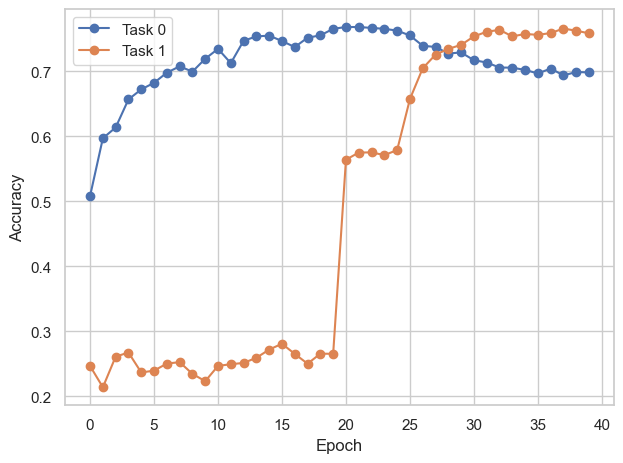

In [14]:
epochs = history["epoch"].dropna()
# use index in epochs to select rows
history_epochs = history.loc[epochs.index]
acc_t0 = history_epochs["performance/test_accuracy_task_0"]
acc_t1 = history_epochs["performance/test_accuracy_task_1"]

epochs_global = history_epochs["epoch"] + 20 * history_epochs["task"]
# plot accuracy
fig, ax = plt.subplots()
ax.plot(epochs_global, acc_t0, label="Task 0", marker="o")
ax.plot(epochs_global, acc_t1, label="Task 1", marker="o")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
fig.tight_layout()
plt.savefig(os.path.join(logpath, "test_accuracy.png"))

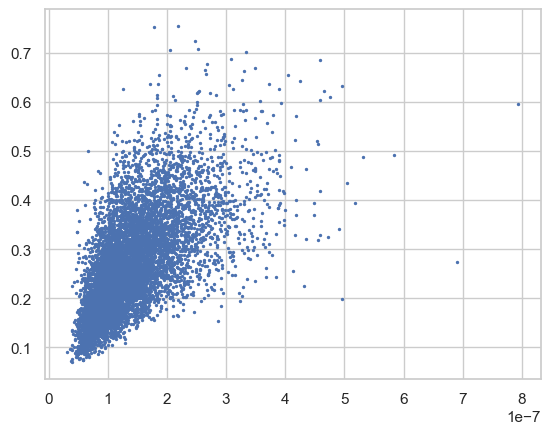

In [24]:
batches = history["batch"].dropna()
history_batches = history.loc[batches.index]

grad_norm_range = history_batches["gradient norms/linear.weight norm range"]
grad_norm_null = history_batches["gradient norms/linear.weight norm nullspace"]

fig, ax = plt.subplots()
ax.scatter(grad_norm_range, grad_norm_null, s=2)

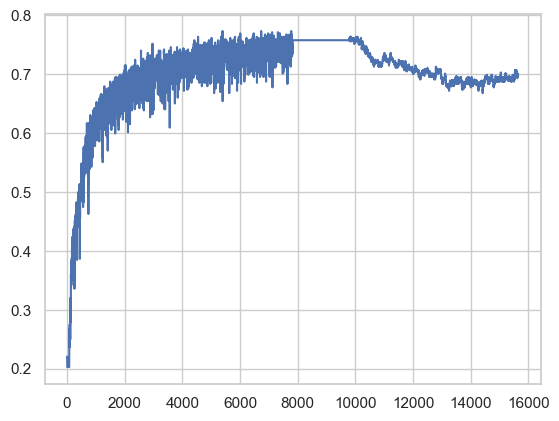

In [15]:
plt.figure()
plot_t0_performance(history)
plt.show()

In [ ]:
grad_cosine_metrics = [c for c in history.columns if "gradient cosines" in c]
grad_cosine_metrics.sort()
grad_cosine_metrics

In [ ]:
weight_names = []
for i in range(10):
    weight_names.append(f"conv_{i}")
weight_names.append(f"linear")

layout = (3, 4)
fig, axes = plt.subplots(*layout, figsize=(20, 12))
plot_cosine_with_t0(axes, history, weight_names, split="train")
plot_cosine_with_t0(axes, history, weight_names, split="eval")
plt.savefig(os.path.join(logpath, "gradient_cosine_t0.png"))

In [ ]:
history.columns

In [ ]:
xnull = history["gradient norms/linear.weight norm nullspace"].dropna()
xrange = history["gradient norms/linear.weight norm range"].dropna()
step = np.arange(len(xnull))


fig = plt.figure()
plt.scatter(xnull, xrange, c=step)
plt.xlabel("nullspace")
plt.ylabel("range")